<a href="https://colab.research.google.com/github/twishi03/Llms/blob/main/scRNA_ZeroShot_UCE_36m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universal Cell Embedding Notebook Demo
This Jupyter notebook demo showcases the application of the Universal Cell Embeddings (UCE) model, guiding users through the process of embedding single-cell RNA sequencing data into a universal latent space. The demo includes steps for data preprocessing, generating cell embeddings using the UCE model, and visualizing the embedded cells in a meaningful biological context. Additionally, it demonstrates the model's zero-shot capabilities by integrating new datasets and identifying novel cell types without requiring further model training. Through this demo, users will gain hands-on experience with UCE's powerful features, facilitating the exploration and analysis of diverse single-cell datasets.

The paper ["Universal Cell Embeddings: A Foundation Model for Cell Biology"](https://www.biorxiv.org/content/10.1101/2023.11.28.568918v1.full.pdf) introduces the Universal Cell Embedding (UCE) model, designed to provide a comprehensive representation of cellular diversity across species and tissues. This foundation model, trained on extensive single-cell transcriptomic data, creates a unified biological latent space enabling the analysis and integration of new cell data without the need for additional annotations or model fine-tuning. UCE demonstrates remarkable capabilities in capturing biological variations and mitigating experimental noise, facilitating insights into cell type organization, developmental lineages, and novel cell functions. The model's ability to embed data from unobserved species and its application in creating an Integrated Mega-scale Atlas of 36 million cells highlight its potential for advancing cell biology research.




## Hugging Face Login
To access the Hugging Face models and resources, you need to authenticate using your Hugging Face account. This can be done seamlessly within the notebook using the `notebook_login` function from the `huggingface_hub` library. First, you need to create an access token from your Hugging Face account. Go to your [Hugging Face profile](https://huggingface.co/settings/tokens), create a new token with the appropriate permissions, and copy it. Then, run the following code in a code cell:


In [ ]:
from huggingface_hub import notebook_login
notebook_login()

## Clone Hub Repo

In [ ]:
!git clone https://github.com/minwoosun/UCE.git

Cloning into 'UCE'...
remote: Enumerating objects: 151, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 151 (delta 34), reused 31 (delta 26), pack-reused 100 (from 1)
Receiving objects: 100% (151/151), 73.12 KiB | 2.92 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [ ]:
%cd UCE

/content/UCE


In [ ]:
! pip install -r requirements.txt

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

## Download 10k PBMC dataset
You can choose to download a smaller subset of the 10k PBMC dataset for faster demo. We made avaiable 100 and 1k cells subset, named "100_pbmcs_proc_subset.h5ad" and "1k_pbmcs_proc_subset.h5ad". You simply have to modify the filename in hf_hub_download().

In [ ]:
from huggingface_hub import hf_hub_download
data_path = hf_hub_download(repo_id="minwoosun/uce-misc", filename="1k_pbmcs_proc_subset.h5ad")

1k_pbmcs_proc_subset.h5ad:   0%|          | 0.00/8.57M [00:00<?, ?B/s]

## Run UCE model on loaded data

In [ ]:
! python eval_single_anndata.py --adata_path {data_path} --dir "./" --model_loc "minwoosun/uce-100m"

Download Complete!
Proccessing 1k_pbmcs_proc_subset
6060.0
1k_pbmcs_proc_subset (1000, 8371)
Wrote Shapes Dict
8371
Max Code: 613
Loaded model:
minwoosun/uce-100m
100% 40/40 [01:04<00:00,  1.61s/it]
*****Wrote Anndata to:*****
./1k_pbmcs_proc_subset_uce_adata.h5ad


# Visualize UCE embeddings through UMAP

The UMAP (Uniform Manifold Approximation and Projection) embedding plot provides a two-dimensional visualization of high-dimensional single-cell RNA sequencing data. By reducing the dimensionality of the data, UMAP allows us to observe the clustering of cells based on their gene expression profiles. In the plot, each point represents a single cell, and points that are closer together indicate cells with similar transcriptional profiles. The colors represent different cell types or conditions, providing insights into the biological organization and relationships among the cells. This visualization helps in identifying distinct cell populations, understanding the heterogeneity within a dataset, and discovering novel cell types or states

In [ ]:
!pip install umap-learn matplotlib

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


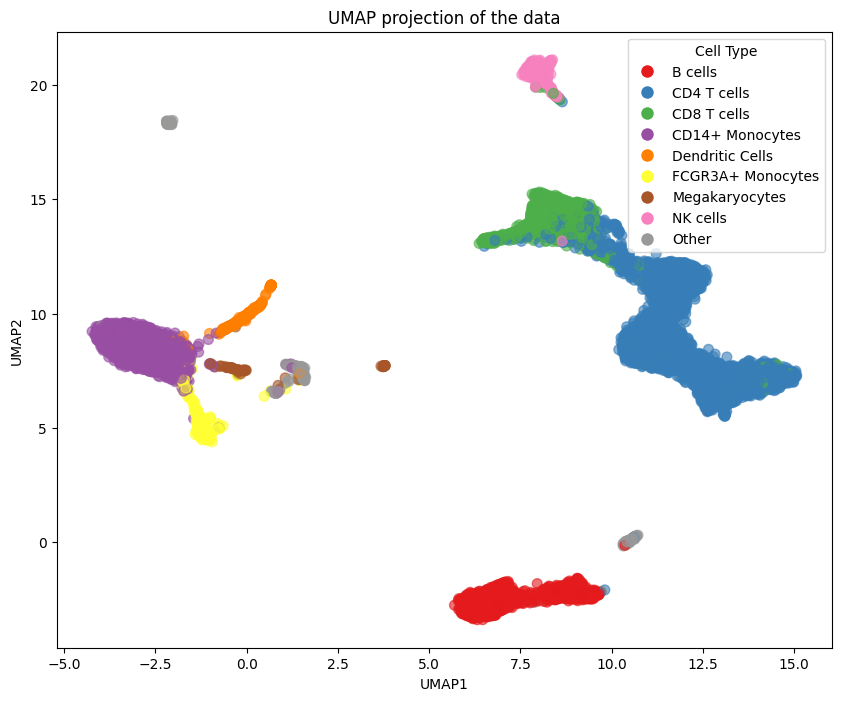

In [ ]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
import scanpy as sc

# Read the .h5ad file
adata = sc.read_h5ad('./10k_pbmcs_proc_uce_adata.h5ad')

labels = pd.Categorical(adata.obs["cell_type"])

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(adata.obsm["X_uce"])

plt.figure(figsize=(10, 8))

# Create the scatter plot
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=labels.codes, cmap='Set1', s=50, alpha=0.6)

# Create a legend
handles = []
for i, cell_type in enumerate(labels.categories):
    handles.append(plt.Line2D([0], [0], marker='o', color='w', label=cell_type,
                              markerfacecolor=plt.cm.Set1(i / len(labels.categories)), markersize=10))

plt.legend(handles=handles, title='Cell Type')
plt.title('UMAP projection of the data')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()



# Build a cell-type classifier using UCE embeddings

We train a classifier to predict cell types based on their embeddings generated by the Universal Cell Embeddings (UCE) model. The classifier is trained using labeled single-cell RNA sequencing data, where each cell type is associated with a unique embedding in the UCE space. By learning the patterns and relationships within these embeddings, the classifier can accurately identify the cell type of new, unlabeled cells. This process involves training a machine learning model, such as a logistic regression or a neural network, on the UCE embeddings and their corresponding labels. Once trained, the classifier can be used to annotate new datasets, facilitating the discovery of novel cell types and states. This approach enhances the analysis of single-cell data by leveraging the universal and comprehensive representation provided by the UCE model, making it a powerful tool for biological research and understanding cellular diversity.

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

# Perform train/test split
train_data, test_data = train_test_split(adata, test_size=0.2, random_state=42)

X_train = train_data.obsm['X_uce']
y_train = train_data.obs['cell_type']

X_test = test_data.obsm['X_uce']
y_test = test_data.obs['cell_type']

print(f"Training set shape: {train_data.shape}")
print(f"Test set shape: {test_data.shape}")

Training set shape: (9592, 10809)
Test set shape: (2398, 10809)


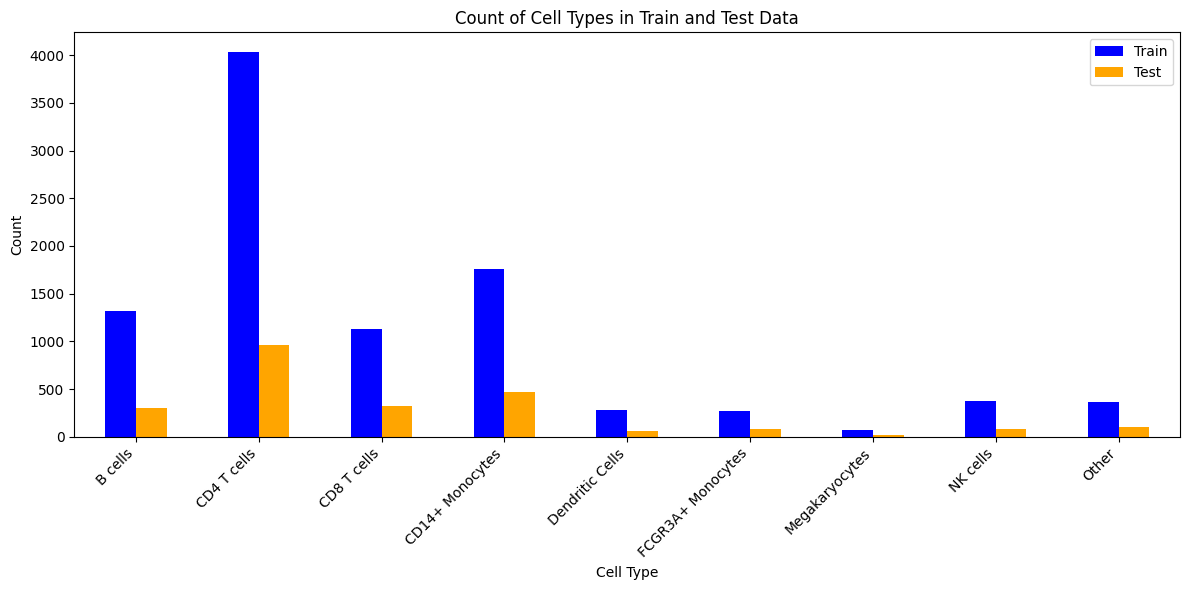

In [ ]:
# Counts of each cell-type in the split data
cell_type_counts_train = train_data.obs.cell_type.value_counts()
cell_type_counts_test = test_data.obs.cell_type.value_counts()

# Combine the two series into a DataFrame
df = pd.DataFrame({
    'Train': cell_type_counts_train,
    'Test': cell_type_counts_test
}).fillna(0)

# Plotting the combined bar plot
ax = df.plot(kind='bar', figsize=(12, 6), color=['blue', 'orange'])
ax.set_xlabel('Cell Type')
ax.set_ylabel('Count')
ax.set_title('Count of Cell Types in Train and Test Data')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

Test Accuracy: 0.96371976647206
Classification Report:
                   precision    recall  f1-score   support

          B cells       1.00      0.99      0.99       298
  CD14+ Monocytes       0.96      0.99      0.97       473
      CD4 T cells       0.97      0.98      0.98       959
      CD8 T cells       0.95      0.93      0.94       320
  Dendritic Cells       1.00      0.89      0.94        62
FCGR3A+ Monocytes       0.97      0.93      0.95        84
   Megakaryocytes       1.00      0.65      0.79        17
         NK cells       0.92      0.96      0.94        84
            Other       0.91      0.84      0.88       101

         accuracy                           0.96      2398
        macro avg       0.96      0.91      0.93      2398
     weighted avg       0.96      0.96      0.96      2398

Confusion Matrix:
[[295   1   2   0   0   0   0   0   0]
 [  0 467   2   0   0   1   0   0   3]
 [  0   1 943  14   0   0   0   1   0]
 [  0   0  19 296   0   0   0   5   0]
 